**Alunos:**

Gustavo Negrão R. Souza

Enzo Castelo B. Biondi

Héctor Bruno Bueno Figueira

# **Dataset: UFC Fights (2010 - 2020) with Betting Odds**


# Importação das bibliotecas e instação do dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
!pip install gdown

In [ ]:
!gdown 14riNmWREpsgXptYvHWMWa2ZxlZbCcVJk
!gdown 1GNzdsZ_hOzs1KWxw8_38btSbzCYGq5iB
!gdown 1ceIYTs_pd_bJU6e4r1oYNPzmlnhmmeLW
!gdown 1qd79hA3e3OMjIeKh1GH1K4Nfxpcv3NV2
!gdown 1utWSP3vqixjrqbb6V8Yb4tFCjFv3xjwT

Downloading...
From: https://drive.google.com/uc?id=14riNmWREpsgXptYvHWMWa2ZxlZbCcVJk
To: /content/dataset_trab1.csv
100% 707k/707k [00:00<00:00, 116MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GNzdsZ_hOzs1KWxw8_38btSbzCYGq5iB
To: /content/dataset_com_fav2.csv
100% 737k/737k [00:00<00:00, 142MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ceIYTs_pd_bJU6e4r1oYNPzmlnhmmeLW
To: /content/dataset_aprendizado.csv
100% 82.1k/82.1k [00:00<00:00, 61.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qd79hA3e3OMjIeKh1GH1K4Nfxpcv3NV2
To: /content/dataset_com_fav1.csv
100% 717k/717k [00:00<00:00, 116MB/s]
Downloading...
From: https://drive.google.com/uc?id=1utWSP3vqixjrqbb6V8Yb4tFCjFv3xjwT
To: /content/dataset_paises.csv
100% 312/312 [00:00<00:00, 1.52MB/s]


In [ ]:
df = pd.read_csv('dataset_trab1.csv')
df_com_favorito = pd.read_csv('dataset_com_fav1.csv')
df_com_favorito2 = pd.read_csv('dataset_com_fav2.csv')
#df_aprendizado = pd.read_csv('dataset_aprendizado.csv')
df_paises = pd.read_csv('dataset_paises.csv')

# Dataframe utilizado e atributo target

In [ ]:
df

,R_fighter,B_fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,gender,year,Vencedor,Perdedor,Favorito,favorito_cor
0,Kevin Lee,Charles Oliveira,-145.0,135.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Lightweight,MALE,2020,Charles Oliveira,Kevin Lee,Kevin Lee,Red
1,Demian Maia,Gilbert Burns,160.0,-170.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Welterweight,MALE,2020,Gilbert Burns,Demian Maia,Gilbert Burns,Blue
2,Renato Moicano,Damir Hadzovic,-345.0,315.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE,2020,Renato Moicano,Damir Hadzovic,Renato Moicano,Red
3,Johnny Walker,Nikita Krylov,-137.0,127.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Light Heavyweight,MALE,2020,Nikita Krylov,Johnny Walker,Johnny Walker,Red
4,Francisco Trinaldo,John Makdessi,-160.0,150.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE,2020,Francisco Trinaldo,John Makdessi,Francisco Trinaldo,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,Duane Ludwig,Darren Elkins,-155.0,135.0,2010-03-21,"Broomfield, Colorado, USA",USA,Blue,False,Lightweight,MALE,2010,Darren Elkins,Duane Ludwig,Duane Ludwig,Red
4236,John Howard,Daniel Roberts,-210.0,175.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Welterweight,MALE,2010,John Howard,Daniel Roberts,John Howard,Red
4237,Brendan Schaub,Chase Gormley,-260.0,220.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Heavyweight,MALE,2010,Brendan Schaub,Chase Gormley,Brendan Schaub,Red
4238,Mike Pierce,Julio Paulino,-420.0,335.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Welterweight,MALE,2010,Mike Pierce,Julio Paulino,Mike Pierce,Red


In [ ]:
df_com_favorito

,R_fighter,B_fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,gender,year,Vencedor,Perdedor,Favorito,favorito_cor,favorito_vence
0,Kevin Lee,Charles Oliveira,-145.0,135.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Lightweight,MALE,2020,Charles Oliveira,Kevin Lee,Kevin Lee,Red,Perde
1,Demian Maia,Gilbert Burns,160.0,-170.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Welterweight,MALE,2020,Gilbert Burns,Demian Maia,Gilbert Burns,Blue,Vence
2,Renato Moicano,Damir Hadzovic,-345.0,315.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE,2020,Renato Moicano,Damir Hadzovic,Renato Moicano,Red,Vence
3,Johnny Walker,Nikita Krylov,-137.0,127.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Light Heavyweight,MALE,2020,Nikita Krylov,Johnny Walker,Johnny Walker,Red,Perde
4,Francisco Trinaldo,John Makdessi,-160.0,150.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE,2020,Francisco Trinaldo,John Makdessi,Francisco Trinaldo,Red,Vence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4151,Duane Ludwig,Darren Elkins,-155.0,135.0,2010-03-21,"Broomfield, Colorado, USA",USA,Blue,False,Lightweight,MALE,2010,Darren Elkins,Duane Ludwig,Duane Ludwig,Red,Perde
4152,John Howard,Daniel Roberts,-210.0,175.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Welterweight,MALE,2010,John Howard,Daniel Roberts,John Howard,Red,Vence
4153,Brendan Schaub,Chase Gormley,-260.0,220.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Heavyweight,MALE,2010,Brendan Schaub,Chase Gormley,Brendan Schaub,Red,Vence
4154,Mike Pierce,Julio Paulino,-420.0,335.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Welterweight,MALE,2010,Mike Pierce,Julio Paulino,Mike Pierce,Red,Vence


**Atributo alvo** : favorito vence

1: vitória do favorito

0: empate ou derrota do favorito

In [ ]:
y = df_com_favorito['favorito_vence']

In [ ]:
df_binary = pd.get_dummies(y)

In [ ]:
y = df_binary['Vence']

In [ ]:
y

0       0
1       1
2       1
3       0
4       1
       ..
4151    0
4152    1
4153    1
4154    1
4155    1
Name: Vence, Length: 4156, dtype: uint8


# Função Streak
-inserir duas colunas que expressam a sequência de vitória, de derrota e de empate do R_fighter e do B_fighter até a data de cada luta. Foi atribuido 1 para vitória e 0 para empate e -1 para derrota

OBS: comentamos a função para que você não fique esperando 7 min para executá-la. O df_com_aprendizado2 representa o dataframe após a aplicação dessa função

In [ ]:
'''
def streaks (nomeR, nomeB, data):
  #condição separa as linhas onde o lutador está presente em datas anteriores a inserida
  condicaoR = (df_com_favorito[['R_fighter', 'B_fighter']].apply(lambda row: nomeR in row.values, axis=1)) & (df_com_favorito['date'] < data)
  condicaoB = (df_com_favorito[['R_fighter', 'B_fighter']].apply(lambda row: nomeB in row.values, axis=1)) & (df_com_favorito['date'] < data)
  linhas_filtradasR = df_com_favorito[condicaoR]
  linhas_filtradasB = df_com_favorito[condicaoB]
  df_filtradoR = pd.DataFrame(linhas_filtradasR)
  df_filtradoR = pd.DataFrame.reset_index(df_filtradoR, drop = True)
  df_filtradoB = pd.DataFrame(linhas_filtradasB)
  df_filtradoB = pd.DataFrame.reset_index(df_filtradoB, drop = True)
  #colocamos a streak original como zero, para aqueles que não tem lutas anteriores a data
  streakR = 0
  streakB = 0
  for i in range (0, len(df_filtradoR)):
    #como está em ordem descrescente de data, "df_filtradoR['Vencedor'][0]" mostra se ele ganhou a ultima luta dele, se ele venceu, quer dizer que ele está
    em uma sequência positiva
    if df_filtradoR['Vencedor'][0] == nomeR:
      if df_filtradoR['Vencedor'][i] == nomeR:
        #para cada vitória dessa sequência a streak cresce, caso ocorra uma derrota, isso mostra que a sequencia positiva acabou, assim temos um break
        streakR += 1
      else:
        break
    #como está em ordem descrescente de data, "df_filtradoR['Perdedor'][0]" mostra se ele perdeu a ultima luta dele, se ele perdeu, quer dizer que ele está
    em uma sequência negativa
    elif df_filtradoR['Perdedor'][0] == nomeR:
      if df_filtradoR['Perdedor'][i] == nomeR:
        #para cada derrota dessa sequência a streak diminui, caso ocorra uma vitoria, isso mostra que a sequencia negativa acabou, assim temos um break
        streakR -= 1
      else:
        break
  #O processo é repetido para o lutador azul
  for i in range (0, len(df_filtradoB)):
      if df_filtradoB['Vencedor'][0] == nomeB:
        if df_filtradoB['Vencedor'][i] == nomeB:
          streakB += 1
        else:
          break
      elif df_filtradoB['Perdedor'][0] == nomeB:
        if df_filtradoB['Perdedor'][i] == nomeB:
          streakB -= 1
        else:
          break
  return streakR, streakB'''

'\ndef streaks (nomeR, nomeB, data):\n  #condição separa as linhas onde o lutador está presente em datas anteriores a inserida\n  condicaoR = (df_com_favorito[[\'R_fighter\', \'B_fighter\']].apply(lambda row: nomeR in row.values, axis=1)) & (df_com_favorito[\'date\'] < data)\n  condicaoB = (df_com_favorito[[\'R_fighter\', \'B_fighter\']].apply(lambda row: nomeB in row.values, axis=1)) & (df_com_favorito[\'date\'] < data)\n  linhas_filtradasR = df_com_favorito[condicaoR]\n  linhas_filtradasB = df_com_favorito[condicaoB]\n  df_filtradoR = pd.DataFrame(linhas_filtradasR)\n  df_filtradoR = pd.DataFrame.reset_index(df_filtradoR, drop = True)\n  df_filtradoB = pd.DataFrame(linhas_filtradasB)\n  df_filtradoB = pd.DataFrame.reset_index(df_filtradoB, drop = True)\n  #colocamos a streak original como zero, para aqueles que não tem lutas anteriores a data\n  streakR = 0\n  streakB = 0\n  for i in range (0, len(df_filtradoR)):\n    #como está em ordem descrescente de data, "df_filtradoR[\'Vencedor

In [ ]:
'''streaks('Charles Oliveira', 'Kevin Lee', '03/14/2020')'''

"streaks('Charles Oliveira', 'Kevin Lee', '03/14/2020')"

In [ ]:
'''R_streak = []
B_streak = []
#Aqui, calculamos como estava a sequência dos lutadores para cada linha do dataframe
for i in range (0, len(df_com_favorito)):
  teste1, teste2 = streaks(df_com_favorito['R_fighter'][i], df_com_favorito['B_fighter'][i], df_com_favorito['date'][i])
  R_streak = np.append(R_streak, teste1)
  B_streak = np.append(B_streak, teste2)
  '''

"R_streak = []\nB_streak = []\n#Aqui, calculamos como estava a sequência dos lutadores para cada linha do dataframe\nfor i in range (0, len(df_com_favorito)):\n  teste1, teste2 = streaks(df_com_favorito['R_fighter'][i], df_com_favorito['B_fighter'][i], df_com_favorito['date'][i])\n  R_streak = np.append(R_streak, teste1)\n  B_streak = np.append(B_streak, teste2)\n  "

In [ ]:
'''df_com_favorito['R_streak'] = R_streak
df_com_favorito['B_streak'] = B_streak
df_com_favorito['R_streak'] = df_com_favorito['R_streak'].astype(int)
df_com_favorito['B_streak'] = df_com_favorito['B_streak'].astype(int)
df_com_favorito
'''

"df_com_favorito['R_streak'] = R_streak\ndf_com_favorito['B_streak'] = B_streak\ndf_com_favorito['R_streak'] = df_com_favorito['R_streak'].astype(int)\ndf_com_favorito['B_streak'] = df_com_favorito['B_streak'].astype(int)\ndf_com_favorito\n"

In [ ]:
df_com_favorito = df_com_favorito2

# Analisar se cada coluna influencia o nosso atributo alvo

In [ ]:
df_com_favorito

,R_fighter,B_fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,gender,year,Vencedor,Perdedor,Favorito,favorito_cor,favorito_vence,R_streak,B_streak
0,Kevin Lee,Charles Oliveira,-145.0,135.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Lightweight,MALE,2020,Charles Oliveira,Kevin Lee,Kevin Lee,Red,Perde,1,6
1,Demian Maia,Gilbert Burns,160.0,-170.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Welterweight,MALE,2020,Gilbert Burns,Demian Maia,Gilbert Burns,Blue,Vence,3,4
2,Renato Moicano,Damir Hadzovic,-345.0,315.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE,2020,Renato Moicano,Damir Hadzovic,Renato Moicano,Red,Vence,-1,-1
3,Johnny Walker,Nikita Krylov,-137.0,127.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Light Heavyweight,MALE,2020,Nikita Krylov,Johnny Walker,Johnny Walker,Red,Perde,-1,-1
4,Francisco Trinaldo,John Makdessi,-160.0,150.0,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE,2020,Francisco Trinaldo,John Makdessi,Francisco Trinaldo,Red,Vence,-1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4151,Duane Ludwig,Darren Elkins,-155.0,135.0,2010-03-21,"Broomfield, Colorado, USA",USA,Blue,False,Lightweight,MALE,2010,Darren Elkins,Duane Ludwig,Duane Ludwig,Red,Perde,0,0
4152,John Howard,Daniel Roberts,-210.0,175.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Welterweight,MALE,2010,John Howard,Daniel Roberts,John Howard,Red,Vence,0,0
4153,Brendan Schaub,Chase Gormley,-260.0,220.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Heavyweight,MALE,2010,Brendan Schaub,Chase Gormley,Brendan Schaub,Red,Vence,0,0
4154,Mike Pierce,Julio Paulino,-420.0,335.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Welterweight,MALE,2010,Mike Pierce,Julio Paulino,Mike Pierce,Red,Vence,0,0


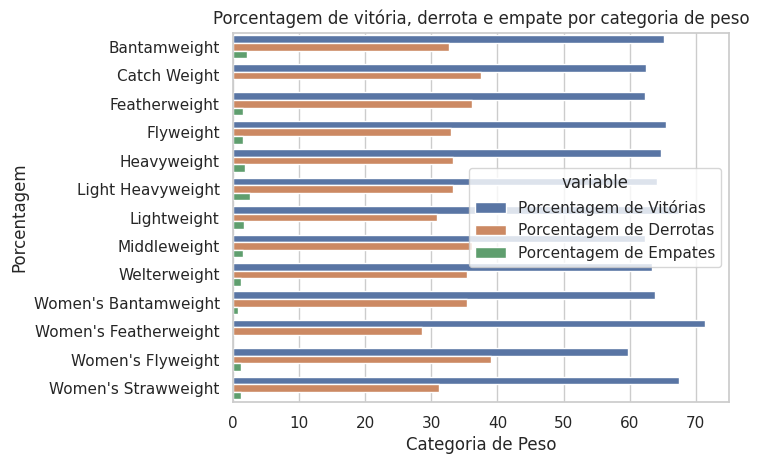

In [ ]:
# Separa os resultados das lutas por categoria
total_por_categoria = df_com_favorito.groupby('weight_class').size()
vitorias_por_categoria = df_com_favorito[df_com_favorito['favorito_vence'] == 'Vence'].groupby('weight_class').size()
derrotas_por_categoria = df_com_favorito[df_com_favorito['favorito_vence'] == 'Perde'].groupby('weight_class').size()
empates_por_categoria = df_com_favorito[df_com_favorito['favorito_vence'] == 'Empate'].groupby('weight_class').size()

# Calcula as porcentagens
porcentagem_vitorias = (vitorias_por_categoria / total_por_categoria) * 100
porcentagem_derrotas = (derrotas_por_categoria / total_por_categoria) * 100
porcentagem_empates = (empates_por_categoria / total_por_categoria) * 100

# Cria um novo DataFrame com as porcentagens
df_com_favorito_porcentagens = pd.DataFrame({
    'Porcentagem de Vitórias': porcentagem_vitorias,
    'Porcentagem de Derrotas': porcentagem_derrotas,
    'Porcentagem de Empates': porcentagem_empates
})

# Reorganiza o DataFrame para facilitar a plotagem
df_com_favorito_porcentagens = df_com_favorito_porcentagens.reset_index()

# Gera o gráfico
sns.set(style="whitegrid")
ax = sns.barplot(x='value', y='weight_class', hue='variable', data=pd.melt(df_com_favorito_porcentagens, ['weight_class']))

ax.set_ylabel('Porcentagem')
ax.set_xlabel('Categoria de Peso')
ax.set_title('Porcentagem de vitória, derrota e empate por categoria de peso')

plt.show()


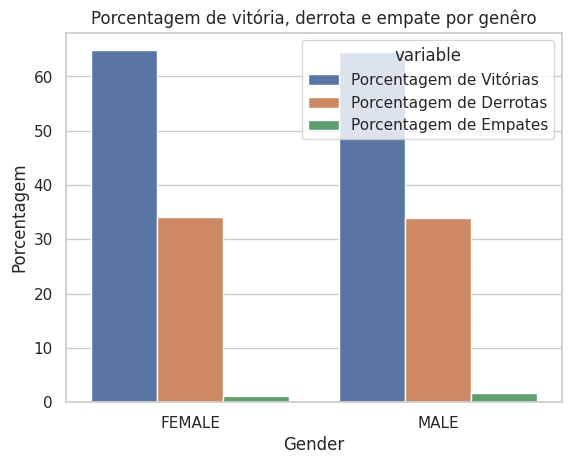

In [ ]:
# Separa os resultados das lutas por categoria
total_por_categoria = df_com_favorito.groupby('gender').size()
vitorias_por_categoria = df_com_favorito[df_com_favorito['favorito_vence'] == 'Vence'].groupby('gender').size()
derrotas_por_categoria = df_com_favorito[df_com_favorito['favorito_vence'] == 'Perde'].groupby('gender').size()
empates_por_categoria = df_com_favorito[df_com_favorito['favorito_vence'] == 'Empate'].groupby('gender').size()

# Calcula as porcentagens
porcentagem_vitorias = (vitorias_por_categoria / total_por_categoria) * 100
porcentagem_derrotas = (derrotas_por_categoria / total_por_categoria) * 100
porcentagem_empates = (empates_por_categoria / total_por_categoria) * 100

# Cria um novo DataFrame com as porcentagens
df_com_favorito_porcentagens = pd.DataFrame({
    'Porcentagem de Vitórias': porcentagem_vitorias,
    'Porcentagem de Derrotas': porcentagem_derrotas,
    'Porcentagem de Empates': porcentagem_empates
})

# Reorganiza o DataFrame para facilitar a plotagem
df_com_favorito_porcentagens = df_com_favorito_porcentagens.reset_index()

# Gera o gráfico
sns.set(style="whitegrid")
ax = sns.barplot(x='gender', y='value', hue='variable', data=pd.melt(df_com_favorito_porcentagens, ['gender']))

ax.set_ylabel('Porcentagem')
ax.set_xlabel('Gender')
ax.set_title('Porcentagem de vitória, derrota e empate por genêro')

plt.show()

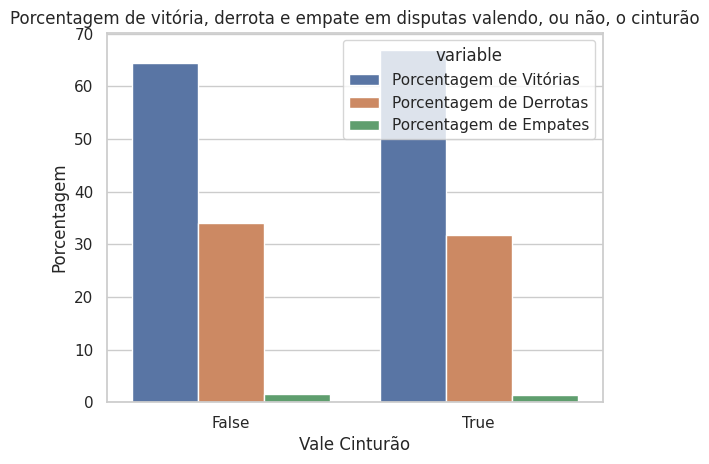

In [ ]:
# Separa os resultados das lutas por categoria
total_por_categoria = df_com_favorito.groupby('title_bout').size()
vitorias_por_categoria = df_com_favorito[df_com_favorito['favorito_vence'] == 'Vence'].groupby('title_bout').size()
derrotas_por_categoria = df_com_favorito[df_com_favorito['favorito_vence'] == 'Perde'].groupby('title_bout').size()
empates_por_categoria = df_com_favorito[df_com_favorito['favorito_vence'] == 'Empate'].groupby('title_bout').size()

# Calcula as porcentagens
porcentagem_vitorias = (vitorias_por_categoria / total_por_categoria) * 100
porcentagem_derrotas = (derrotas_por_categoria / total_por_categoria) * 100
porcentagem_empates = (empates_por_categoria / total_por_categoria) * 100

# Cria um novo DataFrame com as porcentagens
df_com_favorito_porcentagens = pd.DataFrame({
    'Porcentagem de Vitórias': porcentagem_vitorias,
    'Porcentagem de Derrotas': porcentagem_derrotas,
    'Porcentagem de Empates': porcentagem_empates
})

# Reorganiza o DataFrame para facilitar a plotagem
df_com_favorito_porcentagens = df_com_favorito_porcentagens.reset_index()

# Gera o gráfico
sns.set(style="whitegrid")
ax = sns.barplot(x='title_bout', y='value', hue='variable', data=pd.melt(df_com_favorito_porcentagens, ['title_bout']))

ax.set_ylabel('Porcentagem')
ax.set_xlabel('Vale Cinturão')
ax.set_title('Porcentagem de vitória, derrota e empate em disputas valendo, ou não, o cinturão')

plt.show()

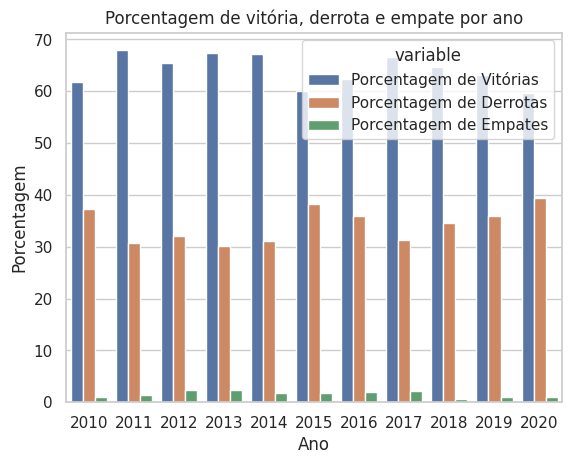

In [ ]:
# Separa os resultados das lutas por categorias
total_por_categoria = df_com_favorito.groupby('year').size()
vitorias_por_categoria = df_com_favorito[df_com_favorito['favorito_vence'] == 'Vence'].groupby('year').size()
derrotas_por_categoria = df_com_favorito[df_com_favorito['favorito_vence'] == 'Perde'].groupby('year').size()
empates_por_categoria = df_com_favorito[df_com_favorito['favorito_vence'] == 'Empate'].groupby('year').size()

# Calcula as porcentagens
porcentagem_vitorias = (vitorias_por_categoria / total_por_categoria) * 100
porcentagem_derrotas = (derrotas_por_categoria / total_por_categoria) * 100
porcentagem_empates = (empates_por_categoria / total_por_categoria) * 100

# Cria um novo DataFrame com as porcentagens
df_com_favorito_porcentagens = pd.DataFrame({
    'Porcentagem de Vitórias': porcentagem_vitorias,
    'Porcentagem de Derrotas': porcentagem_derrotas,
    'Porcentagem de Empates': porcentagem_empates
})

# Reorganiza o DataFrame para facilitar a plotagem
df_com_favorito_porcentagens = df_com_favorito_porcentagens.reset_index()

# Gera o gráfico
sns.set(style="whitegrid")
ax = sns.barplot(x='year', y='value', hue='variable', data=pd.melt(df_com_favorito_porcentagens, ['year']))

ax.set_ylabel('Porcentagem')
ax.set_xlabel('Ano')
ax.set_title('Porcentagem de vitória, derrota e empate por ano')

plt.show()

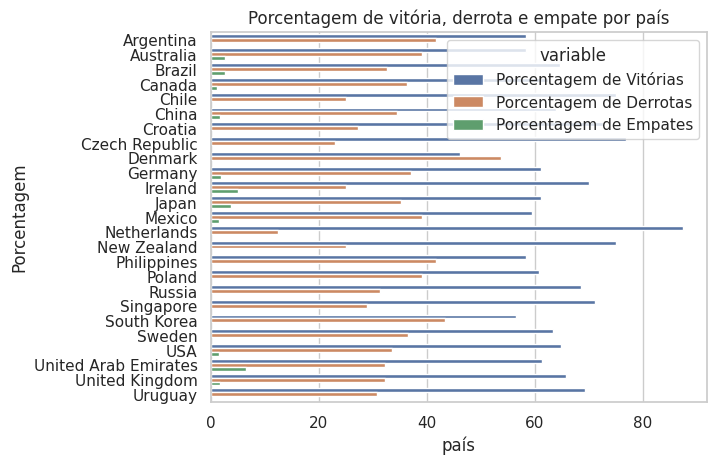

In [ ]:
# Separa os resultados das lutas por categoria
total_por_categoria = df_com_favorito.groupby('country').size()
vitorias_por_categoria = df_com_favorito[df_com_favorito['favorito_vence'] == 'Vence'].groupby('country').size()
derrotas_por_categoria = df_com_favorito[df_com_favorito['favorito_vence'] == 'Perde'].groupby('country').size()
empates_por_categoria = df_com_favorito[df_com_favorito['favorito_vence'] == 'Empate'].groupby('country').size()

# Calcula as porcentagens
porcentagem_vitorias = (vitorias_por_categoria / total_por_categoria) * 100
porcentagem_derrotas = (derrotas_por_categoria / total_por_categoria) * 100
porcentagem_empates = (empates_por_categoria / total_por_categoria) * 100

# Cria um novo DataFrame com as porcentagens
df_com_favorito_porcentagens = pd.DataFrame({
    'Porcentagem de Vitórias': porcentagem_vitorias,
    'Porcentagem de Derrotas': porcentagem_derrotas,
    'Porcentagem de Empates': porcentagem_empates
})

# Reorganiza o DataFrame para facilitar a plotagem
df_com_favorito_porcentagens = df_com_favorito_porcentagens.reset_index()

# Gera o gráfico
sns.set(style="whitegrid")
ax = sns.barplot(x='value', y='country', hue='variable', data=pd.melt(df_com_favorito_porcentagens, ['country']))

ax.set_ylabel('Porcentagem')
ax.set_xlabel('país')
ax.set_title('Porcentagem de vitória, derrota e empate por país')

plt.show()

In [ ]:
#dataframe (importado do trabalho 1) que mostra o número de eventes por países durante toda a amostragem
df_paises

,País,Total_de_eventos
0,USA,217
1,Brazil,36
2,Canada,29
3,United Kingdom,15
4,Australia,14
5,China,6
6,Mexico,6
7,Sweden,6
8,Japan,5
9,Germany,5


Percebe-se que há países que fogem do padrão das porcentagens (vitórias, derrotas e empates), como a Denmark.Entretanto, os países que fugiram do padrão foram os países que ocorreram 1 ou 2 eventos ao longo dos anos. Assim, nota-se que a coluna "country" parece não influenciar o nosso atributo alvo.

# Gerar o conjuntos de dados que será utilizado para o aprendizado

In [ ]:
df_aprendizado = df_com_favorito.copy()

#transformar os dados Red e Blue em 1 e 0, respectivamente:
df_binary2 = pd.get_dummies(df_aprendizado['favorito_cor'])
cor = df_binary2['Red']
cor
df_aprendizado['favorito_cor'] = cor

#retirar as colunas que não influenciam no resultado favorito_vence:
df_aprendizado = df_aprendizado.drop(['R_fighter', 'B_fighter', 'date', 'location', 'country', 'Winner', 'title_bout', 'weight_class', 'gender', 'year', 'Vencedor',
                     'Perdedor', 'Favorito', 'favorito_vence'], axis=1)
df_aprendizado

,R_odds,B_odds,favorito_cor,R_streak,B_streak
0,-145.0,135.0,1,1,6
1,160.0,-170.0,0,3,4
2,-345.0,315.0,1,-1,-1
3,-137.0,127.0,1,-1,-1
4,-160.0,150.0,1,-1,3
...,...,...,...,...,...
4151,-155.0,135.0,1,0,0
4152,-210.0,175.0,1,0,0
4153,-260.0,220.0,1,0,0
4154,-420.0,335.0,1,0,0


# Aprendizado de Máquina

Estratégia utilizada:

-Aprendizado Supervisionado com o objetivo de classificar se o lutador favorito venceu ou não venceu

-Separação dos dados para treino e para teste: cross-validation.

In [ ]:
#Separar os dados para teste e para treino
X_train, X_test, y_train, y_test = train_test_split(df_aprendizado, y, test_size=0.25, random_state=42, stratify=y)

#normalizar os dados de teste e de treino
scaled = StandardScaler() #Pega cada elemento da coluna e subtrai dele a média e divide pelo desvio padrão.
X_train_scaled = scaled.fit_transform(X_train) #scaled.fit_transform(X_train):possível reutilizar a mesma transformação no conjunto de teste.
X_test_scaled = scaled.transform(X_test)

acuracia_media = []  #lista que representa a acuracia média de cada K

# Vamos usar validação cruzada estratificada com 10 folds e com 30 K´s
for k in np.arange(1, 30):
    print('k = ', k)
    clf = KNeighborsClassifier(n_neighbors=k)
    cv_results = cross_val_score(clf, X_train_scaled, y_train, cv=10) #resultado: acurácia do treinamento para um determinado K
    print(cv_results)
    acuracia_media.append(np.mean(cv_results))

print(f"\n\n{acuracia_media}")

k =  1
[0.58653846 0.56730769 0.56730769 0.56089744 0.57692308 0.54487179
 0.56730769 0.5659164  0.61093248 0.54983923]
k =  2
[0.53525641 0.5        0.49358974 0.48717949 0.50320513 0.48717949
 0.5        0.50803859 0.53376206 0.48231511]
k =  3
[0.59615385 0.60897436 0.625      0.59615385 0.59294872 0.57371795
 0.61858974 0.59807074 0.63344051 0.59163987]
k =  4
[0.60897436 0.58974359 0.6025641  0.56410256 0.57371795 0.56089744
 0.58012821 0.59163987 0.61093248 0.59485531]
k =  5
[0.625      0.625      0.625      0.59615385 0.59615385 0.61858974
 0.58974359 0.60771704 0.59485531 0.62700965]
k =  6
[0.61217949 0.61858974 0.58333333 0.58974359 0.58012821 0.59294872
 0.59935897 0.56270096 0.59163987 0.60128617]
k =  7
[0.65064103 0.66666667 0.625      0.61858974 0.61858974 0.59935897
 0.61858974 0.59807074 0.62379421 0.64630225]
k =  8
[0.64102564 0.65384615 0.60897436 0.59294872 0.56730769 0.56730769
 0.59935897 0.56913183 0.59163987 0.60771704]
k =  9
[0.6474359  0.66346154 0.63141026

In [ ]:
acuracia_max= max(acuracia_media)
acuracia_max

0.6300952263170914

In [ ]:
melhor_k = acuracia_media.index(acuracia_max) + 1
melhor_k

27

Comparar o nosso melhor K com os dados teste

In [ ]:
#Separar os dados em 10 folds obedecendo ao balanceamento dos nossos rótulos.
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# classificador
clf = KNeighborsClassifier(n_neighbors=melhor_k)
# Treinamento do Classificador
clf.fit(X_train_scaled,y_train) #O método fit é chamado para ajustar o modelo aos dados de treinamento, permitindo que o classificador aprenda padrões e relações entre os recursos e os rótulos.
# Predizer o modelo treinado
labels_pred = clf.predict(X_test_scaled)
labels_pred


array([0, 1, 0, ..., 1, 1, 1], dtype=uint8)

In [ ]:
accuracy_score(y_test, labels_pred)

0.6217516843118384

E se apostarmos tudo em favorito vence?

In [ ]:
sum(y)/len(y)

0.6446102021174206

# Conclusão

Pode-se notar que a acurácia do melhor modelo foi igual a 0.6361...

Diante dos dados fornecidos, é possível perceber que o nosso modelo e o nosso dataset não apresenta alguns dados importantes para avaliar a fase/o desempenho do jogador, o que poderia melhorar o nosso desempenho. Alguns desses dados podem ser:

-Pontos obtidos em cada luta (golpes certos, controle do octógono, pressão de golpes, takedowns): favorece quem está lutando bem nas últimas lutas

-Estilo de Luta (boxe,jiu jitsu,...): o estilo do adversário pode favorecer ou prejudicar a vitória do favorito

# **FIM!!!**

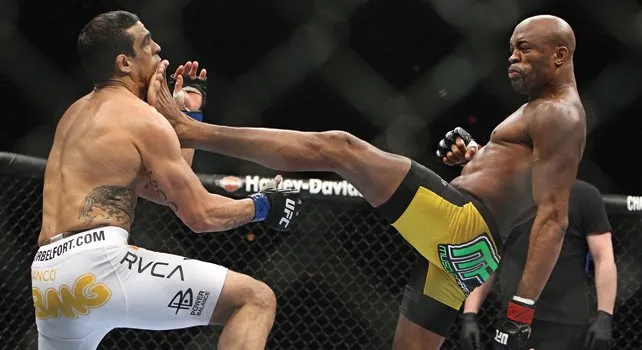